# 2. INTRODUÇÃO AO USO DO OSMnx PARA ANÁLISE DE REDES ESPACIAIS


A biblioteca OSMnx é uma ferramenta de código aberto desenvolvida para facilitar o acesso e a análise de dados geoespaciais do OpenStreetMap (OSM). Com ela, é possível baixar e modelar redes viárias e outras infraestruturas urbanas em qualquer localidade do mundo, usando apenas algumas linhas de código. A OSMnx é construída sobre a biblioteca NetworkX, voltada para criação e manipulação de grafos, e a GeoPandas, que permite o trabalho com dados geoespaciais em Python. Essa integração com a NetworkX possibilita a criação de grafos direcionados que representam redes de ruas e, ao mesmo tempo, a manipulação de dados espaciais complexos por meio da estrutura de GeoDataFrames da GeoPandas.

Em termos práticos, a OSMnx permite a criação de representações de redes urbanas, além da análise de elementos como conectividade, acessibilidade e distribuição espacial de infraestruturas. Por exemplo, é possível baixar a rede viária de uma cidade e, em seguida, calcular o caminho mais curto entre dois pontos, analisar a densidade de interseções ou mesmo visualizar a inclinação média das ruas em áreas com declives, integrando dados de elevação.

As principais funcionalidades da OSMnx para modelagem e análise de redes espaciais incluem a obtenção de redes viárias e infraestruturas urbanas: com um único comando, é possível baixar redes viárias completas, limites administrativos e outros elementos geoespaciais, como edificações e pontos de interesse. Em termos de modelagem e manipulação de infraestruturas, a biblioteca permite construir grafos complexos que representam redes urbanas, como ruas, ciclovias e trilhas, com suporte para diferentes tipos de mobilidade (carro, bicicleta, caminhada). A OSMnx também realiza uma simplificação automática da topologia das redes, consolidando interseções complexas e removendo nós redundantes, o que gera uma representação precisa e funcional da infraestrutura urbana. Outro recurso importante é o cálculo de métricas de rede, como centralidade, conectividade e densidade de interseções, proporcionando uma compreensão mais aprofundada sobre a acessibilidade e o fluxo na rede. Além disso, as redes modeladas podem ser exportadas em formatos compatíveis com outros softwares SIG e de análise de redes, como GraphML, GeoPackage e XML. 

Essas funcionalidades tornam a OSMnx uma ferramenta abrangente para quem deseja estudar redes espaciais urbanas e realizar análises detalhadas de infraestrutura, transporte e acessibilidade. Assim, o uso da OSMnx é adequado para uma variedade de projetos e estudos que envolvem análise e modelagem de redes espaciais, incluindo planejamento urbano, acessibilidade e otimização de rotas. No planejamento urbano, a OSMnx permite obter e analisar dados sobre a conectividade de ruas, a distribuição de pontos de interesse e a acessibilidade de diferentes áreas, auxiliando profissionais a avaliar a estrutura de bairros e a infraestrutura de transporte. Em estudos de acessibilidade, a biblioteca facilita o cálculo de distâncias e tempos de viagem entre pontos, sendo útil para análises que buscam medir a acessibilidade a serviços, como escolas, hospitais e áreas comerciais. Já na otimização de rotas, a modelagem de redes e o cálculo de trajetos tornam a OSMnx uma ferramenta valiosa para estudos de otimização de trajetos, considerando fatores como distância, tempo de viagem e declividade das ruas.




**O projeto OpenStreetMap**

O OpenStreetMap (OSM) é uma plataforma colaborativa de mapeamento que oferece dados geográficos de código aberto, abrangendo uma grande quantidade de informações, como redes de ruas, limites administrativos, edifícios, pontos de interesse, entre outros. Criado em 2004, o OSM é continuamente atualizado por uma comunidade global de voluntários que contribuem com dados coletados por GPS, imagens de satélite e levantamentos de campo. Esses dados estão disponíveis para qualquer pessoa, permitindo uma ampla variedade de aplicações, desde navegação e análise de redes até planejamento urbano e desenvolvimento de aplicativos.

Para facilitar o acesso a esses dados, o OpenStreetMap disponibiliza uma API (Application Programming Interface), que permite consultas e extrações de informações geográficas por meio de código. A API do OSM é projetada para que os usuários possam recuperar dados geoespaciais específicos, como redes viárias e pontos de interesse, em áreas definidas por coordenadas geográficas, limites de cidades, ou caixas delimitadoras. A biblioteca OSMnx utiliza essa API para acessar automaticamente os dados do OpenStreetMap, permitindo que o usuário baixe e analise redes e outros elementos de infraestrutura urbana de maneira simplificada.

Com a OSMnx, é possível fazer consultas personalizadas ao OpenStreetMap, simplificando o processo de acesso a dados e permitindo análises espaciais detalhadas.
A descrição completa dos tipos de dados disponíveis no **OpenStreetMap (OSM)** pode ser encontrada diretamente na [Wiki do OpenStreetMap](https://wiki.openstreetmap.org/), que é a principal fonte de documentação para todas as tags e categorias de dados mapeados no OSM. 





### **2.1 Preparação do Ambiente de trabalho**

Para utilizar a biblioteca OSMnx, é necessário preparar o ambiente com algumas dependências básicas, configurando o Google Colab para suportar todas as funcionalidades da biblioteca.


#### **Requisitos**

A OSMnx depende de outras bibliotecas de Python para realizar a modelagem e análise de redes espaciais. As principais dependências incluem:

- **NetworkX**: Biblioteca para manipulação e análise de grafos, necessária para construir redes viárias e infraestruturas.
- **GeoPandas**: Permite a manipulação de dados geoespaciais, transformando as redes obtidas em estruturas que podem ser visualizadas e analisadas geograficamente.
- **Matplotlib**: Utilizada para visualização de dados e redes.
- **Shapely**: Fornece operações geométricas básicas, como interseção e união de polígonos.

Utilizaremos ainda a biblioteca `mapclassify`, que fornece métodos para classificação de dados espaciais, facilitando a criação de intervalos ou classes para mapear dados geográficos com diferentes esquemas de categorização.

#### **Instalação da OSMnx no Google Colab**
Para instalar a OSMnx e a mapclassify no Google Colab, execute o seguinte comando para instalar a biblioteca e suas dependências:

In [1]:
# !pip install osmnx
# !pip install mapclassify

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import mapclassify

In [3]:
print("OSMnx version:", ox.__version__)

OSMnx version: 1.9.4


## **2.2 Acessando Dados do OpenStreetMap**


A OSMnx permite que os usuários localizem áreas específicas por meio de geocodificação e consultas diretas ao OpenStreetMap. A geocodificação é o processo de transformar nomes de lugares ou endereços em coordenadas geográficas (latitude e longitude). Com a OSMnx, é possível utilizar essas coordenadas para definir uma área de interesse e baixar dados do OpenStreetMap.


Inicialmente, vamos tentar obter o polígono de São Paulo:

<Axes: >

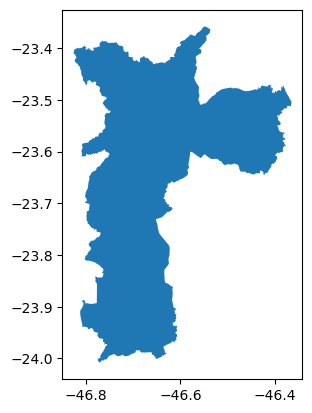

In [4]:
# Nome do local para consulta
nome_local = "São Paulo, Brasil"

# Consulta e obtenção do polígono do local
area = ox.geocode_to_gdf(nome_local)

# Plotagem da área consultada
area.plot()

Neste caso, ao usarmos "São Paulo, Brasil", o OSMnx interpretou essa consulta como o município de São Paulo. Assim, ele retornou o polígono correspondente apenas à cidade de São Paulo, em vez de incluir o estado inteiro. Se quisermos obter o polígono referente ao estado, precisamos ser mais específicos na consulta.
Vamos alterar o valor para "Estado de São Paulo, Brasil", pois isso indica ao OSMnx que queremos o contorno do estado:

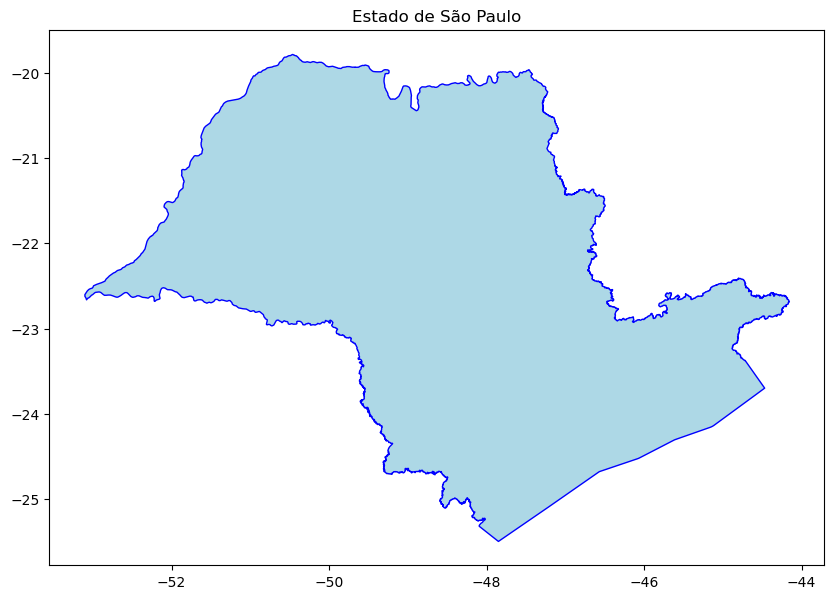

In [5]:
# Nome do local para consulta, especificando o estado
nome_local = "Estado de São Paulo, Brasil"

# Consulta e obtenção do polígono do estado
area = ox.geocode_to_gdf(nome_local)

# Plotagem da área consultada
fig, ax = plt.subplots(figsize=(10, 10))
area.plot(ax=ax, color="lightblue", edgecolor="blue")
ax.set_title("Estado de São Paulo")
plt.show()

Com essa mudança, o OSMnx retorna o polígono correspondente ao estado inteiro, não apenas à cidade. Lembre-se, portanto, de que a especificidade é importante: ao referir-se a uma cidade ou um estado, o nome usado na consulta influencia diretamente o resultado obtido.

Agora vamos detalhar como obter o polígono de um bairro específico. Neste capítulo, nossa área de estudo será o bairro da Liberdade, em São Paulo. Para isso, podemos fazer uma consulta específica utilizando o nome do bairro e da cidade.

<Axes: >

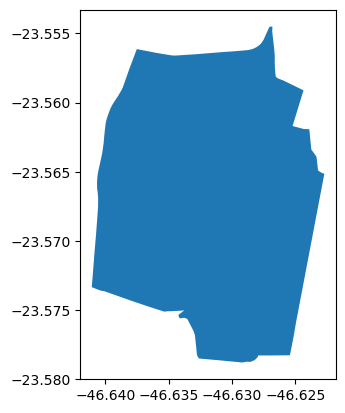

In [6]:
# Nome do local para consulta
bairro = "Liberdade, São Paulo, Brasil"

# Consulta e obtenção do polígono do local
area = ox.geocode_to_gdf(bairro)

# Plotagem da área consultada
area.plot()

O código acima busca e plota o polígono do bairro da Liberdade. No entanto, esse plot é estático e não permite interação, sendo útil apenas para uma visualização inicial.

Para uma visualização mais prática e interativa, vamos centralizar o mapa no bairro da Liberdade e adicionar seu contorno em um mapa do Folium. 

Primeiro, calculamos o centro do polígono que representa o bairro, usando-o como ponto de referência para centralizar o mapa. Em seguida, criamos um mapa interativo com o Folium, ajustando o zoom para visualizar adequadamente o bairro. Finalmente, adicionamos o polígono ao mapa, desenhando o contorno do bairro sobre a visualização interativa.

In [7]:
# Consulta e obtenção do polígono do local
area = ox.geocode_to_gdf(bairro)

# Reprojetar a geometria para um sistema de coordenadas projetado
area = area.to_crs(epsg=3857)  # Usar EPSG 3857 para projeção métrica

# Obter o centro do polígono para centralizar o mapa
centro = [area.geometry.centroid.y.values[0], area.geometry.centroid.x.values[0]]

# Reprojetar de volta para o sistema geográfico para exibição no mapa
area = area.to_crs(epsg=4326)

# Criar o mapa usando o centro do bairro
mapa = folium.Map(location=centro, zoom_start=15)

# Adicionar o polígono da área ao mapa
geo_json = area.to_json()
folium.GeoJson(geo_json, name="Bairro da Liberdade").add_to(mapa)

# Exibir o mapa
mapa

No código acima:

- **`area.geometry.centroid`**: Calcula o ponto central do polígono para definir a localização inicial do mapa.
- **`folium.Map()`**: Cria um mapa interativo centralizado no ponto calculado e com zoom ajustado.
- **`folium.GeoJson()`**: Transforma o polígono obtido de OSMnx para um formato GeoJSON, adicionando-o ao mapa com o contorno definido.



Agora vamos explorar como extrair e visualizar dados de edificações e infraestrutura urbana no OpenStreetMap (OSM) usando o OSMnx. Vamos nos concentrar em contornos de edifícios e parques no bairro da Liberdade.



**Extraindo e Visualizando Contornos de Edifícios**

O OpenStreetMap armazena dados detalhados sobre edifícios de muitos locais em todo o mundo, que incluem os contornos (ou footprints) dos prédios. Podemos acessar essas informações utilizando o OSMnx e a tag `building`.

As **tags do OpenStreetMap (OSM)** são informações associadas aos elementos mapeados que descrevem suas características. Cada elemento geoespacial no OSM – seja um nó, caminho ou relação – é classificado e detalhado usando tags que consistem em pares de chave e valor. Essas tags fornecem contexto e detalham os objetos mapeados, como estradas, edifícios, rios e outros tipos de infraestrutura e pontos de interesse.

Cada tag é um par `chave=valor`. A chave representa o tipo de característica, e o valor fornece a especificação dessa característica. Por exemplo:
- `highway=residential` indica uma estrada de tráfego local.
- `building=yes` descreve um objeto como um edifício.
- `amenity=school` identifica uma escola.

As tags do OSM abrangem diversas categorias, algumas das quais são:

- **Estradas e Trânsito (highway)**: Inclui tipos de vias como `highway=motorway` para rodovias e `highway=footway` para calçadas.
- **Edifícios (building)**: Tag comum usada para classificar tipos de construções. Exemplo: `building=residential`.
- **Áreas Verdes e Natureza (landuse, natural)**: Inclui `landuse=forest` para áreas florestais e `natural=water` para corpos d’água.
- **Serviços e Equipamentos (amenity)**: Para descrever locais de serviço, como `amenity=parking` para estacionamento.
- **Infraestrutura Comercial (shop)**: Classificação de estabelecimentos comerciais, como `shop=supermarket` para supermercados.
- **Recreação e Turismo (leisure, tourism)**: `leisure=park` para parques e `tourism=hotel` para hotéis.

Ao utilizar uma biblioteca como o **OSMnx** para acessar dados do OSM, as tags são essenciais para filtrar e escolher os tipos de elementos que queremos obter. Por exemplo, ao buscar uma rede de estradas, você pode usar a tag `highway` com valores específicos para incluir apenas tipos desejados de vias.

A descrição completa dos tipos de dados disponíveis no **OpenStreetMap (OSM)** pode ser encontrada diretamente na [Wiki do OpenStreetMap](https://wiki.openstreetmap.org/), que é a principal fonte de documentação para todas as tags e categorias de dados mapeados no OSM. Abaixo estão os links diretos para algumas páginas importantes que descrevem os tipos de dados e tags comumente usadas:

- [Página principal das tags](https://wiki.openstreetmap.org/wiki/Tags) – Visão geral das tags do OSM.
- [Highway](https://wiki.openstreetmap.org/wiki/Key:highway) – Descrição das classificações de vias e estradas.
- [Building](https://wiki.openstreetmap.org/wiki/Key:building) – Informações sobre tipos de edifícios.
- [Amenity](https://wiki.openstreetmap.org/wiki/Key:amenity) – Listagem de serviços e equipamentos públicos.
- [Landuse](https://wiki.openstreetmap.org/wiki/Key:landuse) – Categorias de uso da terra e áreas naturais.


Voltando ao exemplo de aplicação, inicialmente vamos definir as configurações e buscar os contornos dos edifícios no bairro.

In [8]:
# Definindo a tag para buscar contornos de edifícios
tags = {"building": True}

# Extraindo contornos de edifícios no bairro da Liberdade
gdf_edificios = ox.features_from_place(bairro, tags)
print(gdf_edificios.shape)  # Exibe o número de edifícios encontrados

# Plotando os contornos dos edifícios
fig, ax = ox.plot_footprints(gdf_edificios, figsize=(20, 15))

Nesse código:
- **`features_from_place()`**: extrai todos os contornos de edifícios para o bairro especificado.
- **`plot_footprints()`**: plota esses contornos em uma visualização estática para uma visão geral rápida dos edifícios.


**Visualizando os Contornos dos Edifícios em um Mapa Interativo**

Para uma visualização mais detalhada, podemos adicionar esses contornos a um mapa interativo usando o Folium. Isso nos permitirá inspecionar a área e os edifícios com mais flexibilidade.

In [ ]:
# Criando o mapa centrado no bairro da Liberdade
mapa = folium.Map(location=centro, zoom_start=15)

# Adicionando o polígono da área ao mapa
geo_json = area.to_json()
folium.GeoJson(geo_json, name="Bairro da Liberdade").add_to(mapa)

# Adicionando os contornos dos edifícios ao mapa
for _, row in gdf_edificios.iterrows():
    # Verifica se a geometria é um polígono antes de adicionar ao mapa
    if row.geometry.geom_type == 'Polygon':
        folium.GeoJson(row.geometry.__geo_interface__, style_function=lambda x: {
            'fillColor': 'grey', 'color': 'black', 'weight': 0.5, 'fillOpacity': 0.7
        }).add_to(mapa)

# Exibindo o mapa interativo com edifícios
mapa

Aqui, estamos iterando sobre cada edifício e adicionando seu contorno ao mapa. Cada contorno de edifício é preenchido com uma cor cinza para diferenciar as áreas construídas no bairro.



**Extraindo e visualizando Parques**

Além de edificações, o OSM também possui dados sobre parques e áreas de lazer. Podemos extrair essas informações utilizando a tag `leisure` com o valor `"park"`.

In [ ]:
# Definindo a tag para buscar parques
tags = {"leisure": "park"}

# Extraindo parques no bairro da Liberdade
gdf_parques = ox.features_from_place(bairro, tags)
print(gdf_parques.shape)  # Exibe o número de parques encontrados

# Plotando os contornos dos parques
fig, ax = ox.plot_footprints(gdf_parques, figsize=(20, 15))

Para uma visualização rápida, o código acima mostra todos os parques em uma visualização estática, similar à visualização dos edifícios. Assim como fizemos anteriormente, podemos adicionar os contornos dos parques em um mapa interativo:

In [ ]:
# Adicionando os contornos dos parques ao mapa interativo
for _, row in gdf_parques.iterrows():
    if row.geometry.geom_type == 'Polygon':
        folium.GeoJson(row.geometry.__geo_interface__, style_function=lambda x: {
            'fillColor': 'green', 'color': 'darkgreen', 'weight': 0.5, 'fillOpacity': 0.6
        }).add_to(mapa)

# Exibindo o mapa com edifícios e parques sobrepostos
mapa

Nesse caso, os parques são representados com preenchimento verde para indicar áreas verdes e diferenciá-los visualmente das edificações.


**Extraindo e visualizando pontos de ônibus**

Para visualizar a infraestrutura de transporte, como pontos de ônibus, podemos utilizar a chave `highway` com o valor `bus_stop`.

In [ ]:
# Definir a tag para baixar pontos de ônibus
tags = {"highway": "bus_stop"}

# Obter todos os pontos de ônibus na área especificada
gdf_onibus = ox.features_from_place(bairro, tags)

# Exibir o número de pontos de ônibus baixados
print(gdf_onibus.shape)

# Plotar os pontos de ônibus
gdf_onibus.plot()

**Extraindo e visualizando cursos d'água**

Para cursos d'água, que podem ser relevantes em análises ambientais ou de planejamento urbano, utilizamos a chave `waterway`.

In [ ]:
# Definir a tag para baixar cursos d'água
tags = {"waterway": True}

# Obter todos os cursos d'água na área especificada
gdf_rios = ox.features_from_place(bairro, tags)

# Exibir o número de cursos d'água baixados
print(gdf_rios.shape)

# Plotar os cursos d'água
gdf_rios.plot()

**Extraindo e visualizando pontos de interesse (amenities)**

Para facilitar a análise de pontos de interesse em uma área urbana, o OpenStreetMap (OSM) categoriza locais específicos sob a chave "amenity". Esta chave abrange uma variedade de estabelecimentos e serviços. Entre eles, encontramos hospitais, escolas, restaurantes e muitos outros que podem ser considerados pontos de interesse ou "amenidades". Com o OSMnx, podemos extrair esses dados e visualizá-los.

Primeiro, vamos fazer uma consulta para obter todos os pontos de interesse no bairro da Liberdade. Utilizando `amenity: True`, extraímos todos os pontos disponíveis, sem especificar tipos.

In [ ]:
# Definir a tag para baixar todas as amenities
tags = {"amenity": True}

# Obter todas as amenities na área especificada
gdf_amenities = ox.features_from_place(bairro, tags)

# Exibir o número de amenities baixadas
print(gdf_amenities.shape)  # Mostra quantas amenidades foram baixadas

# Plotar as amenities em uma visualização estática
gdf_amenities.plot()

No código acima:

- **`features_from_place()`**: extrai todas as amenidades no bairro especificado.
- **`.shape`**: exibe o número total de linhas e colunas do GeoDataFrame, indicando quantas amenidades foram encontradas.
- **`.plot()`**: cria uma visualização rápida para verificar a distribuição das amenidades.


Se quisermos focar em uma amenidade específica, como hospitais, podemos alterar o valor da chave `amenity` para "hospital". Isso ajuda a filtrar apenas os pontos de interesse relevantes.

In [ ]:
# Definir a tag para baixar apenas hospitais
tags = {"amenity": "hospital"}

# Obter todos os hospitais na área especificada
gdf_hospitais = ox.features_from_place(bairro, tags)

# Exibir o número de hospitais baixados
print(gdf_hospitais.shape)

# Plotar os hospitais
gdf_hospitais.plot()

**Trabalhando com diferentes Tags simultaneamente**

É possível visualizar simultaneamente diferentes elementos que fazem parte do conjunto de dados do OSM. Vamos a um exemplo.

Inicialmente, definimos as tags que do OSM. Em nosso exemplo, vamos utilizar:
- **`tags_edificacoes`**: Identifica edifícios em geral com a tag `"building": True`.
- **`tags_hospitais`**: Define a categoria `"hospital"` para buscar apenas hospitais.
- **`tags_onibus`**: Utiliza a tag `highway` com valor `"bus_stop"` para identificar pontos de ônibus.
- **`tags_parques`**: Usa a tag `"leisure": "park"` para localizar parques.

Essas tags nos permitem buscar cada tipo de infraestrutura separadamente, conforme a classificação no OSM.

In [ ]:
# Definir as tags para cada tipo de amenidade
tags_edificacoes = {"building": True}
tags_hospitais = {"amenity": "hospital"}
tags_onibus = {"highway": "bus_stop"}
tags_parques = {"leisure": "park"}

Agora vamos utilizar as tags para obter os dados.

In [ ]:
# Baixar os dados para cada categoria
gdf_edificacoes = ox.features_from_place(bairro, tags_edificacoes)
gdf_hospitais = ox.features_from_place(bairro, tags_hospitais)
gdf_onibus = ox.features_from_place(bairro, tags_onibus)
gdf_parques = ox.features_from_place(bairro, tags_parques)

Cada consulta retorna um `GeoDataFrame` que armazenará os dados de localização e contorno para cada tipo de amenidade.

Em seguida, realizamos a plotagem.

In [ ]:
# Criar a figura e o eixo para o plot
fig, ax = plt.subplots(figsize=(10, 10))

O parâmetro `figsize` controla o tamanho do gráfico.
Para cada `GeoDataFrame` baixado, vamos configurar a cor, o tamanho e o rótulo para a legenda. Cada categoria é plotada de forma diferenciada para facilitar a interpretação visual.

In [ ]:
# Plotar os contornos das edificações
gdf_edificacoes.plot(ax=ax, color="grey", edgecolor="black", alpha=0.5, linewidth=0.5, label="Edificações")

# Plotar os hospitais
gdf_hospitais.plot(ax=ax, color="red", markersize=20, label="Hospitais", alpha=0.7)

# Plotar as paradas de ônibus
gdf_onibus.plot(ax=ax, color="blue", markersize=10, label="Paradas de Ônibus", alpha=0.7)

# Plotar os parques
gdf_parques.plot(ax=ax, color="green", edgecolor="darkgreen", alpha=0.6, linewidth=0.5, label="Parques")

# Adicionar título e legenda
ax.set_title("Edificações, Hospitais, Paradas de Ônibus e Parques - Liberdade", fontsize=15)
ax.legend()

# Remover eixos para uma visualização mais limpa
ax.set_axis_off()

# Exibir o plot
plt.show()

## 2.2 Trabalhando com a rede viária

A análise da infraestrutura de transporte em áreas urbanas depende, essencialmente, do entendimento da rede viária. A seguir, exploraremos como as redes viárias são representadas e como utilizar o OSMnx para manipular e analisar esses dados de maneira eficaz.


O OSMnx retorna um **MultiDiGraph** do NetworkX, uma variação do **DiGraph** (grafo direcionado) que permite múltiplas arestas entre o mesmo par de nós. Essa estrutura é adequada para redes viárias, pois permite representar vias com diferentes direções de tráfego, como mão única e mão dupla, com cada direção modelada por uma aresta separada. 

Em áreas complexas, como rodovias e cruzamentos, onde múltiplos caminhos podem conectar dois pontos, o MultiDiGraph possibilita que cada segmento seja representado individualmente, com atributos específicos como comprimento, limite de velocidade e tipo de via.

O MultiDiGraph no OSMnx possibilita representar corretamente vias com sentidos opostos, rotatórias, rampas e outras estruturas viárias complexas. Cada segmento de via, mesmo que conectado aos mesmos nós, pode conter atributos detalhados (por exemplo, `length`, `maxspeed`, `highway`), garantindo maior precisão e flexibilidade para a análise de redes de transporte urbano.


Em uma rede viária:
- **Nós (Nodes)**: São pontos onde as ruas se encontram, como interseções ou curvas. Eles representam locais de mudança de direção ou de conexão entre vias.
- **Arestas (Edges)**: São os segmentos de ruas que conectam dois nós consecutivos. Cada aresta representa um trecho de rua entre dois pontos.



### 2.2.1 Obtenção de dados da Rede viária do OSM

Para baixar a rede viária do bairro da Liberdade, utilizamos o parâmetro `network_type="all"`.

In [ ]:
# Baixar a rede viária do bairro da Liberdade
rede_viaria = ox.graph_from_place(bairro, network_type="all")

# Visualizar a rede viária
fig, ax = ox.plot_graph(rede_viaria, bgcolor="w", node_size=0, edge_color="black", edge_linewidth=0.5)

No código acima:

- **`graph_from_place()`**: Realiza a consulta e baixa a rede viária para o bairro especificado, utilizando o tipo de rede "all" para incluir todas as ruas.
- **`plot_graph()`**: Plota o grafo da rede viária com as seguintes configurações:
  - `bgcolor="w"`: Define o fundo branco.
  - `node_size=0`: Define o tamanho dos nós como zero para ocultá-los no gráfico.
  - `edge_color="black"` e `edge_linewidth=0.5`: Define a cor das ruas como preta e a espessura das linhas como 0.5.



**Tipos de Rede no OSMnx**

O OSMnx oferece algumas opções para o parâmetro `network_type`:


1. **`"all"`**: Inclui todos os tipos de vias, como ruas, estradas, ciclovias, calçadas, trilhas e caminhos. 

2. **`"all_private"`**: Similar ao tipo `"all"`, mas inclui vias de uso privado, como estradas internas de condomínios e áreas restritas.

3. **`"drive"`**: Inclui somente as vias onde veículos automotores são permitidos, excluindo ciclovias e calçadas. 

4. **`"drive_service"`**: Expande o tipo `"drive"` para incluir vias de serviço, como acessos a estacionamentos e beco sem saída. 

5. **`"walk"`**: Foca em vias com acesso para pedestres, incluindo calçadas, trilhas e áreas de tráfego exclusivo para pedestres. 

6. **`"bike"`**: Inclui vias onde é permitida a circulação de bicicletas, como ciclovias e trechos compartilhadas. 

7. **`"drive+bike"`**: Combina vias para veículos e bicicletas, baixando apenas os trechos que permitem o compartilhamento entre ambos. 

8. **`"walk+bike"`**: Inclui vias permitidas tanto para pedestres quanto para ciclistas.

9. **`"bike+drive+walk"`**: Baixa todas as vias onde veículos, bicicletas e pedestres podem circular, mas exclui vias exclusivas de pedestres e ciclovias exclusivas. Esse tipo permite uma visão completa dos trechos urbanos que suportam transporte multimodal.



Voltando para o nosso exemplo prático, vamos baixar e visualizar as redes viárias específicas para automóveis e para pedestres para o bairro da Liberdade, em São Paulo. 

Primeiro, usamos o `network_type` para filtrar as vias, baixando separadamente as redes viárias para automóveis e pedestres.

In [ ]:
# Baixar a rede viária para automóveis do bairro Liberdade
grafo_automoveis = ox.graph_from_place(bairro, network_type="drive")

# Visualizar a rede viária para automóveis
fig, ax = ox.plot_graph(grafo_automoveis, bgcolor="w", node_size=0, edge_color="black", edge_linewidth=0.5)

    

A rede viária para pedestres inclui ruas, calçadas e trilhas onde o tráfego de pedestres é permitido.

In [ ]:
# Baixar a rede viária para pedestres na Liberdade
grafo_pedestres = ox.graph_from_place(bairro, network_type="walk")

# Visualizar a rede viária para pedestres
fig, ax = ox.plot_graph(grafo_pedestres, bgcolor="w", node_size=0, edge_color="black", edge_linewidth=0.5)

Para facilitar a comparação, vamos plotar ambas as redes no mesmo gráfico, usando cores diferentes para distinguir as vias para automóveis e para pedestres.

In [ ]:
# Criar a figura e o eixo para o plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar a rede viária para pedestres em azul
ox.plot_graph(grafo_pedestres, ax=ax, node_size=0, edge_color="blue", edge_linewidth=0.5, show=False, close=False)

# Plotar a rede viária para automóveis em vermelho
ox.plot_graph(grafo_automoveis, ax=ax, node_size=0, edge_color="red", edge_linewidth=0.5, show=False, close=False)

# Adicionar título e legenda manual
ax.set_title("Redes Viárias para Automóveis e Pedestres - Liberdade", fontsize=15)
legend_elements = [plt.Line2D([0], [0], color="red", lw=2, label="Automóveis"),
                   plt.Line2D([0], [0], color="blue", lw=2, label="Pedestres")]
ax.legend(handles=legend_elements, loc="upper right")

# Exibir o plot
plt.show()

Além de buscar redes viárias por um nome de local, também é possível definir um ponto central com coordenadas e um raio de busca. 

Para exemplificar, vamos obter a rede viária para automóveis em um raio de 500 metros a partir de um ponto central no bairro da Liberdade.

In [ ]:
liberdade_centro = (-23.561414, -46.633176)  # latitude e longitude
um_km = 500  # raio de 500 metros

# Baixar a rede viária para automóveis dentro do raio de 500 metros ao redor do ponto central da Liberdade
G_liberdade = ox.graph_from_point(liberdade_centro, dist=um_km, network_type="drive")

# Visualizar a rede viária
fig, ax = ox.plot_graph(G_liberdade, node_size=0, edge_color="black", edge_linewidth=0.5, bgcolor="w")

No código acima: 
- **`liberdade_centro`** define as coordenadas geográficas do ponto central do bairro.
- **`dist=500`** limita a rede viária a 500 metros ao redor desse ponto.




Agora vamos baixar e visualizar redes viárias específicas para bicicletas e pedestres, exibindo-as em um único plot para facilitar a análise comparativa.

Ja havíamos baixado a rede de vias para pedestres. Vamos baixar a rede de vias onde bicicletas podem circular, usando `network_type="bike"`. Isso inclui ciclovias e trechos compartilhados onde o tráfego de bicicletas é permitido.

In [ ]:
# Baixar a rede viária para bicicletas na Liberdade
grafo_bike = ox.graph_from_place(bairro, network_type="bike")

# Visualizar a rede viária para bicicletas
fig, ax = ox.plot_graph(grafo_bike, bgcolor="w", node_size=0, edge_color="black", edge_linewidth=0.5)

Para visualizar a rede viária para pedestres e a rede para bicicletas em um mesmo plot, utilizamos cores diferentes para cada tipo de via.

In [ ]:
# Criar a figura e o eixo para o plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar a rede viária para pedestres em azul
ox.plot_graph(grafo_pedestres, ax=ax, node_size=0, edge_color="blue", edge_linewidth=0.5, show=False, close=False)

# Plotar a rede viária para bicicletas em vermelho
ox.plot_graph(grafo_bike, ax=ax, node_size=0, edge_color="red", edge_linewidth=0.5, show=False, close=False)

# Adicionar título e legenda manual
ax.set_title("Redes Viárias para Bicicletas e Pedestres - Liberdade", fontsize=15)
legend_elements = [plt.Line2D([0], [0], color="red", lw=2, label="Bicicleta"),
                   plt.Line2D([0], [0], color="blue", lw=2, label="Pedestres")]
ax.legend(handles=legend_elements, loc="upper right")

# Exibir o plot
plt.show()

A visualização de redes viárias em termos de nós e arestas é essencial para compreender a estrutura e a conectividade do sistema de transporte urbano. Para plotar a rede viária com seus nós e arestas:

In [ ]:
# Visualizar a rede viária com destaque para nós e arestas
fig, ax = ox.plot_graph(grafo_rede_viaria, bgcolor="w", node_size=10, node_color="red", edge_color="black", edge_linewidth=0.5)

Podemos contar os nós e as arestas do grafo para ter uma visão quantitativa da rede viária:

In [ ]:
# Contar o número total de nós e arestas no grafo
num_nos = grafo_rede_viaria.number_of_nodes()
num_arestas = grafo_rede_viaria.number_of_edges()

print("Número total de nós:", num_nos)
print("Número total de arestas:", num_arestas)

### 2.2.2 Visualização Interativa com GeoPandas e Folium

A função `.explore()` da GeoPandas permite criar visualizações interativas dos dados geoespaciais, utilizando a Folium para gerar mapas.

Para visualizar interativamente apenas as arestas ou os nós da rede viária, podemos converter o grafo em GeoDataFrames e utilizar `.explore()`:

In [ ]:
# Converter as arestas para GeoDataFrame e explorar interativamente
ox.graph_to_gdfs(grafo_rede_viaria, nodes=False).explore()

# Converter os nós para GeoDataFrame e explorar interativamente com mapa base diferente
nodes = ox.graph_to_gdfs(grafo_rede_viaria, edges=False)
nodes.explore(tiles="cartodbpositron", marker_kwds={"radius": 3})

Também é possível visualizar ambos em um único mapa interativo.

In [ ]:
# Converter o grafo em GeoDataFrames para nós e arestas
nodes, edges = ox.graph_to_gdfs(grafo_rede_viaria)

# Explorar as arestas no mapa com cor azul e adicionar os nós com cor rosa
m = edges.explore(color="skyblue", tiles="cartodbdarkmatter")
nodes.explore(m=m, color="pink", marker_kwds={"radius": 6})

Vamos gerar uma visualização das paradas de ônibus e da rede viária completa.

In [ ]:
# Definir o nome do local e as opções de mapa
place = "Liberdade, São Paulo, Brasil"
tiles = "cartodbdarkmatter"
mk = {"radius": 4}  # Definir o tamanho dos marcadores

# Explorar as paradas de ônibus no bairro da Liberdade
bus_stops = ox.features_from_place(place, tags={"highway": "bus_stop"})
m = bus_stops.explore(tiles=tiles, color="red", tooltip="name", marker_kwds=mk)

# Explorar a rede viária completa do bairro da Liberdade
road_network = ox.features_from_place(place, tags={"highway": True})
m = road_network.explore(m=m, tiles=tiles, color="blue", tooltip="name")

# Exibir o mapa interativo
m

Para realizar uma análise específica em uma área ao redor de um ponto, podemos definir coordenadas centrais e um raio, como no exemplo abaixo, que inclui paradas de ônibus, linhas de metrô e estações de trem na Vila Madalena.

In [ ]:
# Coordenadas aproximadas do centro da Vila Madalena e raio
centro_vila_madalena = (-23.558213, -46.691616)
raio = 1500  # 1,5 km

# Definir opções de mapa
tiles = "cartodbdarkmatter"
mk = {"radius": 6}

# Explorar paradas de ônibus na área
bus = ox.features_from_point(centro_vila_madalena, tags={"highway": "bus_stop"}, dist=raio)
m = bus.explore(tiles=tiles, color="red", tooltip="name", marker_kwds=mk)

# Explorar linhas de metrô
rail = ox.features_from_point(centro_vila_madalena, tags={"railway": True}, dist=raio)
m = rail.explore(m=m, tiles=tiles, color="yellow", tooltip="name")

# Explorar estações de trem
stations = ox.features_from_point(centro_vila_madalena, tags={"railway": "station"}, dist=raio)
stations.explore(m=m, tiles=tiles, color="green", tooltip="name", marker_kwds=mk)

# Exibir o mapa
m

## 2.2.3 Conversão de grafos de redes viárias


Para realizar diferentes tipos de análises com redes viárias, é útil converter o grafo de uma rede viária em outras estruturas, como um grafo não direcionado, um grafo simplificado ou GeoDataFrames para manipulação geoespacial. 


**Converção para MultiGraph Não Direcionado**

O OSMnx retorna redes viárias como grafos direcionados (`MultiDiGraph`), que incluem a direção das vias. Em alguns casos, pode ser mais apropriado utilizar uma representação não direcionada, especialmente se o sentido das vias não for relevante para a análise.

In [ ]:
# Converter o grafo para MultiGraph não direcionado
grafo_nao_direcionado = grafo_rede_viaria.to_undirected()

# Visualizar o grafo não direcionado
fig, ax = ox.plot_graph(grafo_nao_direcionado, node_size=7, node_color='yellow', edge_color='gray', edge_linewidth=0.7)

**Converter para DiGraph Simplificado**

Em situações onde múltiplas arestas entre nós não são necessárias, é possível simplificar o grafo para um `DiGraph`, que representa apenas uma conexão entre pares de nós. Isso pode ser útil para análises que requerem um grafo mais enxuto, sem duplicação de arestas.

In [ ]:
# Converter para DiGraph simplificado
grafo_direcionado = nx.DiGraph(grafo_rede_viaria)

# Visualizar o grafo simplificado
fig, ax = ox.plot_graph(grafo_direcionado, node_size=7, node_color='yellow', edge_color='gray', edge_linewidth=0.7)

**Converção para GeoDataFrames**

Como vimos em um exemplo anterior, para explorar os atributos dos nós e arestas em um formato geoespacial, podemos converter o grafo em GeoDataFrames. Isso permite manipular os dados viários como pontos (nós) e linhas (arestas).

In [ ]:
# Converter para GeoDataFrames
gdf_nos, gdf_arestas = ox.graph_to_gdfs(grafo_rede_viaria)

# Visualizar os nós e as arestas
gdf_nos.plot()
gdf_arestas.plot()

### 2.2.4 Atributos dos Nós e Arestas de grafos

Após converter para GeoDataFrames, podemos acessar e analisar os atributos disponíveis para cada nó e aresta. Esses atributos são úteis para entender as características de cada ponto de interseção e de cada segmento de rua.


Os nós representam interseções ou cruzamentos na rede viária e podem conter atributos como:
- `osmid`: ID do OpenStreetMap.
- Coordenadas de localização (`x` e `y`).
- Outros dados contextuais, como elevação, se disponível.

In [ ]:
# Contar o número de nós
print("Número total de nós:", len(gdf_nos))

# Exibir as colunas (atributos) dos nós
print(gdf_nos.columns)

As arestas representam os segmentos de rua entre os nós e possuem diversos atributos, como:
- `name`: Nome da rua, se mapeado no OSM.
- `length`: Comprimento do segmento de rua em metros.
- `maxspeed`: Velocidade máxima permitida, se disponível.
- `highway`: Tipo de via, por exemplo, `residential` ou `primary`.
- `oneway`: Indica se a via é de mão única.

Esses atributos auxiliam na análise de características da rede viária, como a identificação de vias principais e a análise de acessibilidade e de tráfego.

In [ ]:
# Exibir as colunas (atributos) das arestas
print(gdf_arestas.columns)

#### 2.2.4.1 Explorando Atributos dos Nós


Os atributos dos nós em um grafo OSMnx armazenam os dados de cada ponto de interseção da rede viária. Os principais atributos encontrados nos nós de uma rede viária do OSMnx são:

1. **`street_count`**: Representa o número de vias que convergem no nó. Em cruzamentos com diversas vias, o valor será mais alto (geralmente 3 ou 4). Em uma extremidade de via, como uma rua sem saída, o valor pode ser 1. 

2. **`x` e `y`**: São as coordenadas do nó em longitude (`x`) e latitude (`y`). Esses valores indicam a localização geográfica exata do ponto na rede viária.

3. **`highway`**: Indica o tipo de via ou cruzamento, conforme categorizado no OpenStreetMap. Esse atributo aparece em nós que representam interseções ou pontos de interesse na rede viária, como cruzamentos de pedestres ou ciclovias. 

4. **`ref`**: Usado para armazenar um identificador de referência do nó, geralmente relacionado ao OpenStreetMap. Esse identificador é útil para consultas adicionais ou para acessar informações de referência diretamente no mapa base do OSM. Esse atributo pode facilitar a integração com outros bancos de dados ou mapas.


Para uma análise detalhada dos dados sobre os nós da rede viária no DataFrame gdf_nos, podemos seguir uma sequência de comandos que verificam e exploram os registros referentes a cada atributo.


Inicialmente, vamos definir as colunas que queremos consultar no DataFrame `gdf_nos`, que representa os nós de uma rede viária. Esse conjunto de colunas inclui dados sobre as coordenadas (`y`, `x`), número de ruas conectadas a cada nó (`street_count`), tipo de via (`highway`), referência do nó (`ref`) e geometria da localização (`geometry`).

In [ ]:
colunas = ['y', 'x', 'street_count', 'highway', 'ref', 'geometry']

Em seguida, exibimos o tipo de dado associado a cada coluna especificada. Isso permite identificar se as colunas possuem o tipo de dado esperado (por exemplo, coordenadas devem ser numéricas, enquanto o tipo de via deve ser categórico). Caso algum tipo de dado não corresponda ao esperado, pode ser necessário realizar ajustes ou conversões.

In [ ]:
print("Tipos de dados de cada coluna em gdf_nos:")
for coluna in colunas:
    print(f"{coluna}: {gdf_nos[coluna].dtype}")

Para visualizar rapidamente o conteúdo dos dados, utilizamos o método `head()`, que exibe as primeiras linhas do DataFrame `gdf_nos`.

In [ ]:
gdf_nos.head()

Para entender a conectividade dos nós, buscamos os valores únicos na coluna `street_count`.

In [ ]:
street_count_unicos = gdf_nos['street_count'].dropna().unique()
print("Valores únicos de street_count:", street_count_unicos)

Da mesma maneira, obtemos os valores únicos da coluna `highway`.

In [ ]:
highway_unicos = gdf_nos['highway'].dropna().unique()
print("Valores únicos de highway:", highway_unicos)

Por fim, visualizamos os valores únicos na coluna `ref`, que pode conter referências adicionais para os nós, como identificadores específicos.

In [ ]:
ref_unicos = gdf_nos['ref'].dropna().unique()
print("Valores únicos de ref:", ref_unicos)

Esses atributos fornecem informações detalhadas sobre cada ponto de interseção ou elemento da rede viária, permitindo compreender a complexidade e a funcionalidade de cada nó. Abaixo está uma explicação de cada um dos atributos e dos valores que eles podem assumir:



1. **`street_count`**: Os valores únicos encontrados são `[3, 4, 5, 1, 6, 2]`, cada um com o seguinte significado:
   - **1**: Indica um ponto final ou uma rua sem saída.
   - **2**: Representa uma conexão direta entre duas ruas, como um segmento reto.
   - **3, 4, 5, 6**: São cruzamentos onde múltiplas ruas se encontram, sugerindo uma estrutura mais complexa da rede viária e possivelmente uma área com mais tráfego.

2. **`highway`**: Os valores únicos para `highway` são `['traffic_signals', 'priority', 'mini_roundabout', 'crossing']`, indicando:
   - **`traffic_signals`**: Semáforos presentes no nó, normalmente em cruzamentos movimentados.
   - **`priority`**: Indica um ponto onde a prioridade é regulamentada, como cruzamentos com placas de prioridade.
   - **`mini_roundabout`**: Uma pequena rotatória que facilita o fluxo de tráfego em áreas urbanas.
   - **`crossing`**: Área de travessia para pedestres ou ciclistas, muitas vezes em cruzamentos ou próximos a pontos de transporte público.

3. **`ref`**: Os valores únicos são `['A-230', 'A-259', 'A-257', 'A-253', 'A-252;A-254', 'A-254', 'A-234', 'A-262', 'A-233']`, onde cada código representa uma estrada ou rota específica. Exemplos incluem:
   - **`A-230`, `A-259`**: Identificadores para estradas principais, comumente rodovias ou vias expressas.
   - **`A-252;A-254`**: Indica um ponto de interseção entre duas estradas, os trechos A-252 e A-254, sugerindo uma interligação importante.



Agora vamos trabalhar com a filtragem e a visualização dos nós. 

Para começar, filtramos os nós que possuem valores específicos de `street_count`, que indicam a quantidade de ruas conectadas em cada nó. Em seguida, visualizamos esses nós em um mapa, colorindo cada valor de `street_count` de maneira distinta para facilitar a análise da complexidade de cada interseção.

In [ ]:
# Filtrar apenas os nós com as classes de street_count desejadas
classes_street_count = [1, 2, 3, 4, 5, 6]
gdf_street_count_nos = gdf_nos[gdf_nos['street_count'].isin(classes_street_count)]

# Plotar os nós de street_count com cores diferentes para cada classe
gdf_street_count_nos.explore(
    column="street_count",
    legend=True,
    tiles="CartoDB Positron",
    tooltip="street_count",
    cmap="Paired",
    marker_kwds={
        "radius": 6,
        "fill": True,
    },
    style_kwds={
        "stroke": True,
        "color": "black",
        "weight": 0.5
    }
)

Para obter uma visão mais completa, podemos sobrepor os nós filtrados de `street_count` em uma camada de arestas (ruas).

In [ ]:
# Plotar a camada de arestas (gdf_arestas)
mapa = gdf_arestas.explore(
    tiles="CartoDB Positron",
    color="black",
    style_kwds={
        "weight": 1,
        "opacity": 0.4
    }
)

# Adicionar os pontos de street_count ao mapa
gdf_street_count_nos.explore(
    m=mapa,
    column="street_count",
    legend=True,
    tooltip="street_count",
    cmap="Paired",
    marker_kwds={
        "radius": 6,
        "fill": True,
    },
    style_kwds={
        "stroke": True,
        "color": "black",
        "weight": 0.5
    }
)

Além disso, podemos criar um gráfico estático que destaca as interseções com diferentes valores de `street_count`, adicionando uma legenda personalizada para representar o número de ruas conectadas em cada nó. Isso permite visualizar melhor as conexões e a complexidade dos cruzamentos.

In [ ]:
# Filtrar os nós com as classes de street_count desejadas
classes_street_count = [1, 2, 3, 4, 5, 6]
gdf_street_count_nos = gdf_nos[gdf_nos['street_count'].isin(classes_street_count)]

# Definir o mapa de cores e rótulos personalizados
cmap = plt.get_cmap("Paired")
colors = [cmap(i / len(classes_street_count)) for i in range(len(classes_street_count))]
labels = [f"{count} Rua{'s' if count > 1 else ''}" for count in classes_street_count]

# Criar o plot com ajuste de proporção para deixar espaço para a legenda
fig, ax = plt.subplots(figsize=(12, 10))

# Plotar a camada de arestas (rede viária) com uma cor suave
gdf_arestas.plot(ax=ax, color="gray", linewidth=0.5, alpha=0.5, label="Rede Viária")

# Plotar os pontos de street_count com cores diferentes para cada classe
gdf_street_count_nos.plot(
    ax=ax,
    column="street_count",
    cmap=cmap,
    markersize=30,
    legend=False
)

# Criar uma legenda personalizada com pontos coloridos
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=8, label=labels[i])
    for i in range(len(classes_street_count))
]

# Adicionar a legenda fora do gráfico
ax.legend(handles=legend_elements, title="Contagem de Interseções (street_count)",
          loc="upper left", bbox_to_anchor=(1, 1))

# Configurações finais do gráfico
plt.title("Interseções de Rua por Contagem de Conexões (street_count)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(False)
plt.tight_layout()
plt.show()

Focando agora nos nós com `street_count` igual a 1, que representam pontos finais ou ruas sem saída, é possível sobrepor esses pontos em uma camada de ruas com cor vermelha suave. Isso destaca as terminações da rede viária no mapa.

In [ ]:
# Filtrar apenas os nós com street_count igual a 1
gdf_street_count_1 = gdf_nos[gdf_nos['street_count'] == 1]

# Plotar a camada de arestas (gdf_arestas) com uma cor vermelha suave como base
mapa = gdf_arestas.explore(
    tiles="CartoDB Positron",
    color="red",
    style_kwds={
        "weight": 1,
        "opacity": 0.5
    }
)

# Adicionar os nós com street_count 1 ao mapa
gdf_street_count_1.explore(
    m=mapa,
    color="blue",
    legend=False,
    tooltip="street_count",
    marker_kwds={
        "radius": 6,
        "fill": True,
    },
    style_kwds={
        "stroke": True,
        "color": "black",
        "weight": 0.5
    }
)

Também é possível filtrar os nós de acordo com tipos específicos de `highway`, como `traffic_signals` e `crossing`, para identificar áreas com semáforos, travessias de pedestres, entre outros. Esses pontos são visualizados com cores diferentes para cada tipo.

In [ ]:
# Filtrar apenas os nós com classes de highway desejadas
classes_highway = ['traffic_signals', 'priority', 'mini_roundabout', 'crossing']
gdf_highway_nos = gdf_nos[gdf_nos['highway'].isin(classes_highway)]

# Plotar os nós de highway com cores diferentes
gdf_highway_nos.explore(
    column="highway",
    legend=True,
    tiles="CartoDB Positron",
    tooltip="highway",
    cmap="Set1",
    marker_kwds={
        "radius": 5,
        "fill": True,
    },
    style_kwds={
        "stroke": True,
        "color": "black",
        "weight": 0.5
    }
)

Por fim, para uma visualização ainda mais específica, selecionamos os nós que possuem o atributo `highway` igual a `traffic_signals`, destacando apenas os pontos onde há semáforos.

In [ ]:
# Filtrar apenas os nós com highway igual a 'traffic_signals'
gdf_traffic_signals = gdf_nos[gdf_nos['highway'] == 'traffic_signals']

# Plotar os nós de highway usando uma cor diferente para cada classe
gdf_traffic_signals.explore(
    column="highway",
    legend=True,
    tiles="CartoDB Positron",
    tooltip="highway",
    cmap="Set1",
    marker_kwds={
        "radius": 5,
        "fill": True,
    },
    style_kwds={
        "stroke": True,
        "color": "black",
        "weight": 0.5
    }
)

#### 2.2.4.2 Explorando Atributos das Arestas

Vamos agora explorar os atributos das arestas da rede viária, que representam cada segmento de rua ou conexão entre dois pontos (nós). Primeiramente, faremos uma visualização básica das arestas e contaremos o número total de segmentos.

In [ ]:
# Plotar o conjunto de dados
gdf_arestas.plot()

In [ ]:
# Contar o número total de arestas
len(gdf_arestas)

Agora iremos verificar as colunas disponíveis no GeoDataFrame `gdf_arestas` para identificar quais atributos estão presentes nas arestas da rede viária.

In [ ]:
print(gdf_arestas.columns)

Esses atributos das arestas em um grafo OSMnx representam características detalhadas de cada segmento de rua ou conexão entre dois pontos (nós) da rede viária. Aqui está o que cada um desses atributos significa:

- **`u`**: Representa o identificador do nó de origem da aresta. Em uma rede viária, esse valor indica o ponto inicial de um segmento de rua.

- **`v`**: Refere-se ao identificador do nó de destino da aresta, ou seja, o ponto final do segmento de rua.

- **`key`**: É um identificador adicional que distingue múltiplas arestas entre os mesmos nós `u` e `v`. Em grafos direcionados e multigrafos (grafos que permitem múltiplas arestas entre pares de nós), o `key` assegura que cada conexão entre dois pontos seja única, mesmo que haja várias faixas ou direções diferentes entre os mesmos nós. Por exemplo, se houver múltiplas faixas ou direções distintas para um trecho de via entre dois pontos, cada segmento terá um valor de `key` exclusivo (como 0, 1, 2, etc.), facilitando a distinção entre eles.

- **`osmid`**: Este identificador único, atribuído pelo OpenStreetMap, permite associar cada segmento de via aos dados originais no OSM. Em alguns casos, `osmid` pode conter múltiplos valores, como `[780219126, 38738766]`, indicando que o segmento é composto por mais de um trecho diferente no OpenStreetMap.

  
- **`name`**: Nome da rua ou estrada, se disponível.
  
- **`maxspeed`**: Velocidade máxima permitida no segmento, geralmente em km/h ou mph, dependendo da região.

- **`lanes`**: Número de faixas de circulação no segmento. 

- **`highway`**: Especifica o tipo de via segundo a classificação do OpenStreetMap, indicando sua importância e função.

- **`bridge`**: Indica se o segmento de rua é uma ponte (`True` para sim; `False` ou valor ausente para não).

- **`width`**: Largura da via, geralmente em metros, caso essa informação esteja disponível.

- **`junction`**: Tipo de interseção em que a via participa, como rotatória (roundabout) ou outro tipo de junção.

- **`reversed`**: Indica se a direção da via foi invertida em relação à direção original no OpenStreetMap.

- **`oneway`**: Especifica se a via é de mão única (`True` para sim; `False` para mão dupla).

- **`access`**: Define restrições de acesso, como `private` (acesso privado), `no` (sem acesso) ou `yes` (acesso permitido).

- **`length`**: Comprimento do segmento de rua, geralmente em metros, calculado pelo OSMnx com base na geometria da linha.

- **`geometry`**: Armazena a geometria da aresta como uma linha (`LineString`), representando a forma do segmento de rua. 



Dando continuidade à exploração dos atributos das arestas, vamos examinar os tipos de dados presentes em algumas colunas-chave de `gdf_arestas`. Isso nos ajudará a confirmar que cada coluna contém o tipo de dado esperado, garantindo a consistência das informações que caracterizam cada segmento da rede viária.

Primeiro, definimos uma lista chamada `colunas`, que contém os nomes dos principais atributos que descrevem as arestas.

In [ ]:
# Lista de colunas a serem verificadas
colunas = ['osmid', 'oneway', 'lanes', 'highway', 'maxspeed', 'reversed', 'length',
           'geometry', 'name', 'bridge', 'access', 'junction', 'width']

Em seguida, para cada coluna da lista `colunas`, verificamos o tipo de dado usando um loop. Esta verificação é importante para assegurar que os valores estão armazenados corretamente, como números inteiros para o número de faixas (`lanes`) ou dados geométricos para a coluna `geometry`.

In [ ]:
# Verificar o tipo de dado de cada coluna
print("Tipos de dados de cada coluna em gdf_arestas:")
for coluna in colunas:
    print(f"{coluna}: {gdf_arestas[coluna].dtype}")

Além disso, visualizamos as primeiras linhas do GeoDataFrame `gdf_arestas` para observar o conteúdo e a estrutura desses atributos.

In [ ]:
# Visualizar as primeiras arestas
gdf_arestas.head()

Ao inspecionar as primeiras linhas de `gdf_arestas` usando `gdf_arestas.head()`, podemos ver exemplos dos identificadores `u`, `v`, e `key`. Suponha que vemos os valores `u=587993`, `v=459347433`, e `key=0`. Isso indica que:

- A aresta conecta o nó de origem `587993` ao nó de destino `459347433`.
- Como `key=0`, esta é a primeira (e possivelmente única) conexão direta entre esses dois nós. 

Se houver várias arestas entre os mesmos nós `u` e `v`, cada uma terá um valor de `key` diferente para diferenciar os segmentos.



Após entender a estrutura das arestas e seus atributos, iremos calcular algumas métricas importantes para a análise da rede viária. Além disso, vamos explorar os valores únicos de atributos que podem aparecer como listas. Essas informações nos ajudam a obter uma visão detalhada sobre a composição e as características dos trecho de rua.

Inicialmente, calculamos o comprimento total da rede viária em metros. A coluna `length` do `gdf_arestas` armazena o comprimento de cada trecho de rua, e somando todos esses valores, obtemos o valor total da extensão da rede.

In [ ]:
# Calcular o comprimento total da rede viária (em metros)
comprimento_total = gdf_arestas["length"].sum()
print("Comprimento total da rede viária (metros):", round(comprimento_total, 2))

Agora vamos recuperar os valores únicos de alguns atributos das arestas.

In [ ]:
# Lista atributos que queremos consultar
atributos = ['lanes', 'highway', 'maxspeed', 'reversed', 'bridge', 'access', 'junction', 'width', 'oneway',]

print("\nValores únicos dos atributos:")
for coluna in atributos:
    # Converter listas em tuplas para usar com set() e coletar valores únicos
    valores_unicos = set(tuple(valor) if isinstance(valor, list) else valor for valor in gdf_arestas[coluna].dropna())
    print(f"{coluna}: {valores_unicos}")

Aqui está uma descrição detalhada dos atributos das arestas e dos valores que eles podem assumir:

- **`lanes`**: 
  - Valores como `'1'`, `'2'`, `'3'`, `'4'`, e `'5'` indicam a quantidade de faixas em uma única direção.
  - Valores como `('2', '3')` e `('4', '3')` indicam variação no número de faixas em diferentes partes do segmento ou direções. Por exemplo, `('2', '3')` poderia representar 2 faixas em uma direção e 3 na outra.

- **`highway`**: 
  - `residential`: Rua residencial, destinada principalmente ao tráfego local.
  - `primary`, `secondary`, `tertiary`: Classificações que representam a importância da estrada, com `primary` sendo mais importante que `secondary` e assim por diante.
  - Sufixos como `_link` (por exemplo, `tertiary_link`) indicam trechos de conexão, como rampas ou curtos trechos de interseções.

- **`maxspeed`**: 
  - Valores como `'20'`, `'30'`, `'40'`, `'50'`, `'60'` representam os limites de velocidade.
  - Tuplas como `('40', '50')` e `('30', '50')` sugerem limites de velocidade distintos para diferentes partes do segmento ou direções. Por exemplo, `('40', '50')` pode indicar 40 km/h em uma direção e 50 km/h na outra.

- **`reversed`**: 
  - `True`: A direção foi invertida.
  - `False`: A direção original foi mantida.
  - O valor `(False, True)` sugere que a direção pode variar em diferentes seções do mesmo segmento.

- **`bridge`**: 
  - `yes`: O segmento é uma ponte.
  - `viaduct`: Especifica que o segmento é um viaduto.

- **`access`**: 
  - `yes`: Acesso permitido a todos.
  - `no`: Acesso restrito ou proibido.
  - `destination`: Acesso permitido apenas para destinos específicos, como residentes ou visitantes.

- **`junction`**: 
  - `roundabout`: Indica uma rotatória.

- **`oneway`**: 
    - `True`: O segmento é de mão única e permite tráfego em apenas uma direção.
    - `False`: O segmento permite tráfego em ambas as direções.




Dando continuidade ao passo a passo, agora vamos explorar diferentes maneiras de visualizar pontes, viadutos e outras características das arestas usando o recurso de mapeamento interativo do GeoDataFrame com o método `.explore()`. Vamos também aplicar filtros específicos para destacar segmentos de ruas com determinadas características, como o limite de velocidade e o tipo de via.

Primeiramente, extraímos as arestas que representam pontes e viadutos para visualizá-las separadamente:

In [ ]:
# Filtrar apenas as pontes e viadutos a partir do GeoDataFrame
gdf_pontes_viadutos = gdf_arestas[gdf_arestas['bridge'].isin(['yes', 'viaduct'])]

Também é possível extrair essas arestas diretamente do grafo e, em seguida, convertê-las para um GeoDataFrame:

In [ ]:
# Extrair arestas que são pontes ou viadutos diretamente do grafo
pontes_viadutos_arestas = [
    (u, v, k) for u, v, k, data in grafo_rede_viaria.edges(keys=True, data=True) 
    if data.get("bridge") in ["yes", "viaduct"]
]

# Criar um subgrafo contendo apenas essas arestas
grafo_pontes_viadutos = grafo_rede_viaria.edge_subgraph(pontes_viadutos_arestas)

# Converter o subgrafo em um GeoDataFrame
gdf_pontes_viadutos = ox.utils_graph.graph_to_gdfs(grafo_pontes_viadutos, nodes=False)

Vamos criar um plot para visualizar as pontes e viadutos, usando o método `.explore()`:

In [ ]:
# Plotar usando .explore()
gdf_pontes_viadutos.explore(
    column="bridge",               
    legend=True,                
    tiles="CartoDB Positron",      
    tooltip=["name", "bridge"],    
    style_kwds={
        "color": "red",            
        "weight": 5                
    }
)

Para visualizar as arestas do grafo de forma interativa, podemos utilizar uma ferramenta de exploração que colore as arestas de acordo com o comprimento de cada segmento. Esse tipo de visualização ajuda a identificar facilmente trechos de diferentes extensões, facilitando a análise visual da rede viária.

In [ ]:
# Explorar as arestas do grafo interativamente, coloridas por comprimento
edges.explore(tiles="CartoDB Positron", column="length", cmap="plasma")

Podemos também visualizar as arestas coloridas de acordo com o tipo de via. Essa visualização facilita a identificação visual dos diferentes tipos de vias presentes na rede, como ruas residenciais, avenidas principais, rodovias, entre outros.

In [ ]:
# Explorar as arestas do grafo interativamente, coloridas por tipo de via
edges.explore(tiles="cartodbdarkmatter", column="highway", cmap="plasma")

Para observar apenas as ruas residenciais, podemos acessar o grafo filtrando este tipo de via e o visualizamos:

In [ ]:
# Baixar o grafo da rede viária apenas com ruas residenciais
grafo_residencial = ox.graph_from_place(bairro, network_type="all", custom_filter='["highway"="residential"]')

# Visualizar o grafo com ruas residenciais usando a função explore
ox.plot_graph_folium(grafo_residencial, popup_attribute="name", edge_width=2, edge_color="blue")

Para filtrar as ruas de acordo com limites de velocidade específicos, como `maxspeed` igual a 40 km/h, aplicamos um filtro para selecionar apenas esses segmentos e destacá-los no mapa:

In [ ]:
# Filtrar apenas as vias com maxspeed igual a '40'
gdf_maxspeed_40 = gdf_arestas[gdf_arestas['maxspeed'].apply(lambda x: '40' in x if isinstance(x, list) else x == '40')]

# Plotar as vias com maxspeed 40 usando explore()
gdf_maxspeed_40.explore(
    tiles="CartoDB Positron",       # Define o tipo de  mapa de fundo
    color="red",                    # Cor para as vias filtradas
    legend=False,                   # Não exibir legenda, pois estamos mostrando apenas um valor de maxspeed
    tooltip="maxspeed",             # Exibir o valor de maxspeed ao passar o mouse
    style_kwds={
        "weight": 3,                # Espessura das linhas para melhor visualização
        "opacity": 0.8              # Opacidade das linhas
    }
)

Além disso, para visualizar vias que possuem um único valor de `maxspeed` (sem listas de valores), aplicamos um filtro adicional e usamos uma paleta de cores para representar diferentes limites de velocidade:

In [ ]:
# Filtrar apenas as vias com um único valor de maxspeed (não armazenado como lista)
gdf_maxspeed_unico = gdf_arestas[gdf_arestas['maxspeed'].apply(lambda x: isinstance(x, str))]

# Plotar as vias com maxspeed único usando explore()
gdf_maxspeed_unico.explore(
    tiles="CartoDB Positron",       # Define o tipo de  mapa de fundo
    column="maxspeed",              # Coluna para diferenciar as vias por velocidade
    cmap="plasma",                  # Usar uma paleta de cores para diferenciar os valores de maxspeed
    legend=True,                    # Exibir legenda para os valores de maxspeed
    tooltip="maxspeed",             # Exibir o valor de maxspeed ao passar o mouse
    style_kwds={
        "weight": 3,                # Espessura das linhas para melhor visualização
        "opacity": 0.9              # Opacidade das linhas
    }
)

No OpenStreetMap (OSM), o atributo `maxspeed` é utilizado para armazenar o limite de velocidade permitido em um segmento de via. A forma como esse valor é armazenado depende da quantidade de velocidades registradas para o segmento:

- **Quando há apenas um limite de velocidade**, o valor é armazenado como um único número (por exemplo, `50`), representando uma velocidade fixa para todo o trecho.
- **Quando há mais de um limite de velocidade**, o valor é armazenado como uma lista (por exemplo, `['30', '50']`), indicando diferentes limites para seções específicas ou direções da via.

Essa diferença na estrutura dos dados pode dificultar consultas e visualizações, pois requer que o código trate esses casos de maneira diferenciada. Ao realizar uma análise ou criar visualizações com base no limite de velocidade, é necessário verificar se o valor é um número único ou uma lista. Caso contrário, algumas vias podem ser omitidas ou processadas incorretamente, comprometendo a precisão dos resultados.